<a href="https://colab.research.google.com/github/aakashk243/Machine_Learning_Lab/blob/main/Random_Forest/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

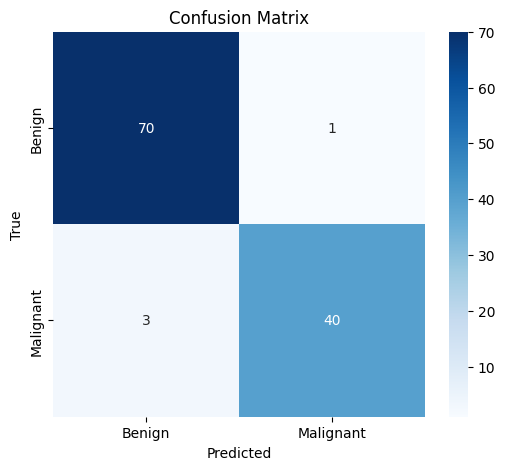


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



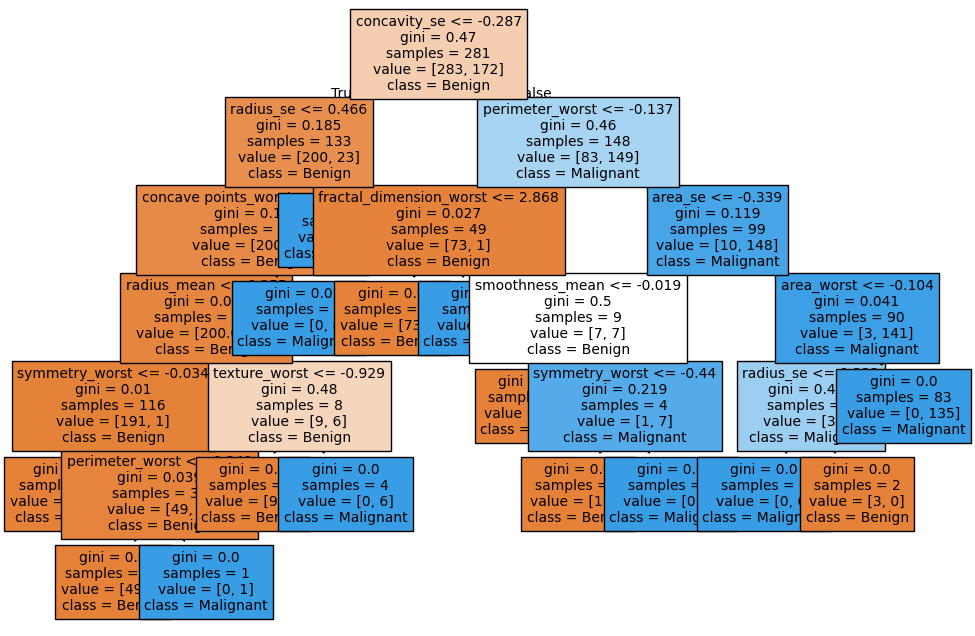

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ML_labActivity/breast-cancer.csv")

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Encode the target variable (Assuming 'diagnosis' is the target)
# Convert categorical values to numeric values: B = 0 (benign), M = 1 (malignant)
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Features and target separation
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting a decision tree from the Random Forest (optional)
plt.figure(figsize=(12, 8))
tree.plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, fontsize=10)
plt.show()

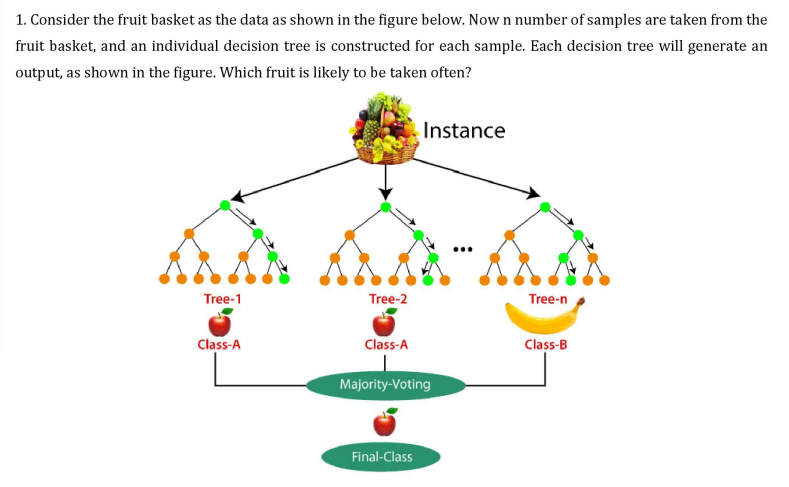

In [ ]:
# Random Forest Example - Fruit Basket Classification
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example fruit dataset (features: [weight, sweetness, color_score])
# Let's assume:
# Apple (Class 0) and Banana (Class 1)
X = np.array([
    [150, 7, 0.8],  # Apple
    [140, 6, 0.75], # Apple
    [160, 8, 0.82], # Apple
    [120, 9, 0.3],  # Banana
    [110, 10, 0.25],# Banana
    [130, 8, 0.35], # Banana
])

y = np.array([0, 0, 0, 1, 1, 1])  # 0 = Apple, 1 = Banana

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Classifier
rf = RandomForestClassifier(n_estimators=5, random_state=42)  # 5 trees for simplicity

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

print("Predictions:", y_pred)
print("Actual:", y_test)

# Example: Predict a new fruit instance
new_fruit = np.array([[145, 7, 0.77]])  # (weight=145, sweetness=7, color=0.77)
prediction = rf.predict(new_fruit)

if prediction[0] == 0:
    print("Final Prediction: Apple 🍎")
else:
    print("Final Prediction: Banana 🍌")


Predictions: [0 1]
Actual: [0 0]
Final Prediction: Apple 🍎
